In [1]:
import topojson
from shapely import geometry
from shapely.ops import shared_paths
from shapely.ops import linemerge

In [19]:
# equal lines
# data = {
#     "abc1": {"type": "LineString", "coordinates": [[0, 0], [1.0, 0], [2.0, 0]]},
#     "abc2": {"type": "LineString", "coordinates": [[0, 0], [1.0, 0], [2.0, 0]]}
# } 

# # forward backward lines
# data = {
#     "abc3": {"type": "LineString", "coordinates": [(0, 0), (10, 0), (10, 5), (20, 5)]},
#     "abc4": {"type": "LineString", "coordinates": [(5, 0), (30, 0), (30, 5), (0, 5)]}
# } 

# # more than two lines
# data = {
#     "abc1": {"type": "LineString", "coordinates": [(0, 0), (15, 2.5), (30, 5)]},
#     "abc2": {"type": "LineString", "coordinates": [(0, 0), (15, 2.5), (30, 5)]},
#     "abc3": {"type": "LineString", "coordinates": [(0, 0), (10, 0), (10, 5), (20, 5)]},
#     "abc4": {"type": "LineString", "coordinates": [(5, 0), (30, 0), (30, 5), (0, 5)]}
# }

# # identical polygon
# data = {
#     "abca1": {"type": "Polygon", "coordinates": [[[0, 0], [1, 1], [2, 0], [0, 0]]]},
#     "abca2": {"type": "Polygon", "coordinates": [[[0, 0], [1, 1], [2, 0], [0, 0]]]}
# }

# reversed identical polygon
data = {
    "abca": {"type": "Polygon", "coordinates": [[[0, 0], [1, 1], [2, 0], [0, 0]]]},
    "acba": {"type": "Polygon", "coordinates": [[[0, 0], [2, 0], [1, 1], [0, 0]]]}
}

# invalid polygon geometry
data = {
    "wrong": {"type": "Polygon", "coordinates": [[[0, 0], [1, 0], [2, 0], [0, 0]]]},
    "valid": {"type": "Polygon", "coordinates": [[[0, 0], [2, 0], [1, 1], [0, 0]]]}
}

# multipolygon with hole
data = {
    "foo": {
        "type": "MultiPolygon",
        "coordinates": [
            [
                [[0, 0], [20, 0], [10, 20], [0, 0]], # CCW
                [[3, 2], [10, 16], [17, 2], [3, 2]] # CW
            ],  
            [
                [[6, 4], [14, 4], [10, 12], [6, 4]] #CCW 
            ],
            [
                [[25, 5], [30, 10], [35, 5], [25, 5]]
            ]
        ]
    }
}

data = {
    "foo": {
        "type": "MultiLineString",
        "coordinates": [
        [[0.0, 0.0], [1, 1], [3, 3]],
        [[1, 1], [0, 1]],
        [[3,3], [4, 4], [0, 1]]
        ]
    }
} 

In [20]:
join = topojson.join(topojson.extract(data))

In [25]:
join

{'type': 'Topology',
 'coordinates': [(0.0, 0.0),
  (1.0, 1.0),
  (3.0, 3.0),
  (1.0, 1.0),
  (0.0, 1.0),
  (3.0, 3.0),
  (4.0, 4.0),
  (0.0, 1.0)],
 'lines': [<shapely.geometry.linestring.LineString at 0x10c6921d0>,
 'rings': [],
 'objects': {'foo': {'type': 'MultiLineString', 'arcs': [0, 1, 2]}},
 'junctions': []}

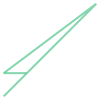

In [26]:
geometry.GeometryCollection([
    geometry.MultiLineString(join['lines']),
    geometry.MultiPolygon(join['rings']),
    geometry.MultiPoint(join['junctions'])    
])